In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
DATA_DIR = '../data'
adata_healthy = sc.read(
    f'{DATA_DIR}/haniffa_healthy_obsmProt.h5ad'
)
adata_disease = sc.read(
    f'{DATA_DIR}/haniffa_disease_obsmProt.h5ad'
)
adata = adata_healthy.concatenate(adata_disease)

In [3]:
condition_key = 'patient_id'
cell_type_key = ["initial_clustering"]
adata = adata[adata.obs[cell_type_key[0]] != 'Mono_prolif']
patients = pd.Series(adata.obs.patient_id.unique())
reference = patients[~patients.str.contains('newcastle')]
query = patients[~patients.isin(reference)]
adata.obs['query'] = adata.obs[condition_key].isin(query).astype('category')

Trying to set attribute `.obs` of view, copying.


In [4]:
adata_tmp = adata.copy()
sc.pp.normalize_total(adata_tmp)
sc.pp.log1p(adata_tmp)
sc.pp.highly_variable_genes(adata_tmp, n_top_genes=4000)
adata.var = adata_tmp.var
adata = adata[:, adata.var['highly_variable']]
source_adata = adata[adata.obs[condition_key].isin(reference)].copy()
target_adata = adata[adata.obs[condition_key].isin(query)].copy()

In [5]:
sc.pp.pca(adata_tmp)
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)

In [15]:
patients = pd.Series(adata_tmp.obs.patient_id.unique())
reference = patients[~patients.str.contains('newcastle')]
query = patients[~patients.isin(reference)]
adata_tmp.obs['query'] = adata_tmp.obs[condition_key].isin(query).astype('category')

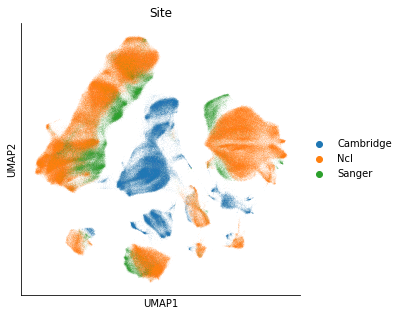

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sc.pl.umap(adata_tmp, color='Site', show=False, ax=ax)
sns.despine()
fig.savefig('../figures/haniffa_norm_umap_site.png', dpi=600, bbox_inches='tight')

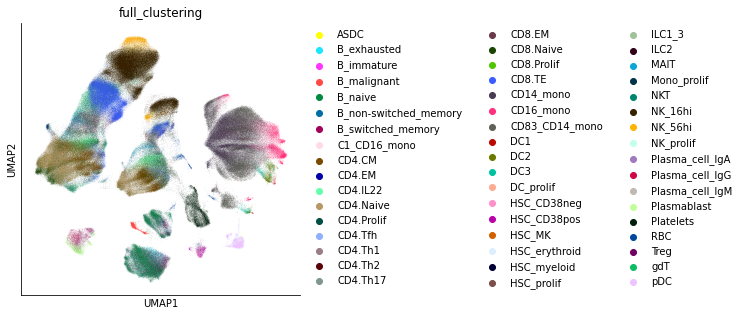

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sc.pl.umap(adata_tmp, color='full_clustering', show=False, ax=ax)
sns.despine()
fig.savefig('../figures/haniffa_norm_umap_ct.png', dpi=600, bbox_inches='tight')

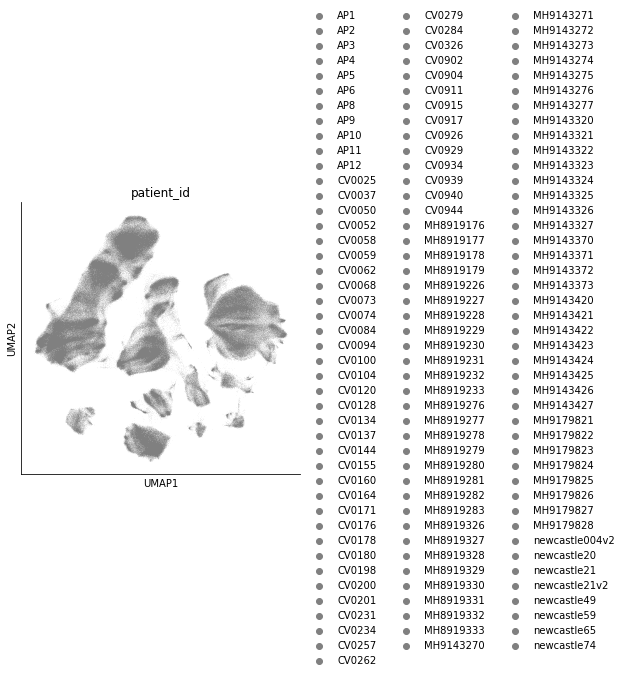

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sc.pl.umap(adata_tmp, color='patient_id', show=False, ax=ax)
sns.despine()
fig.savefig('../figures/haniffa_norm_umap_id.png', dpi=600, bbox_inches='tight')

In [5]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [7]:
adata.write('../data/haniffa_processed.h5ad')

In [14]:
adata_tmp.write('../data/haniffa_processed_norm.h5ad')

In [10]:
adata.obs

,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,full_clustering,initial_clustering,Resample,Collection_Day,...,Status_on_day_collection,Status_on_day_collection_summary,Days_from_onset,Site,time_after_LPS,Worst_Clinical_Status,Outcome,patient_id,batch,query
covid_index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGACCACGA-newcastle65-0,newcastle65,1351,1351,4278.0,178.0,4.160823,CD4.Naive,CD4,Initial,D0,...,Healthy,Healthy,Healthy,Ncl,nan,Healthy,Home,newcastle65,0,True
AAACCTGAGATGTCGG-newcastle65-0,newcastle65,1921,1921,4740.0,127.0,2.679325,NK_16hi,NK_16hi,Initial,D0,...,Healthy,Healthy,Healthy,Ncl,nan,Healthy,Home,newcastle65,0,True
AAACCTGAGGCGATAC-newcastle65-0,newcastle65,1056,1056,2875.0,198.0,6.886957,CD4.Naive,Treg,Initial,D0,...,Healthy,Healthy,Healthy,Ncl,nan,Healthy,Home,newcastle65,0,True
AAACCTGAGTACACCT-newcastle65-0,newcastle65,2140,2140,5260.0,316.0,6.007605,NK_16hi,NK_16hi,Initial,D0,...,Healthy,Healthy,Healthy,Ncl,nan,Healthy,Home,newcastle65,0,True
AAACCTGAGTGAATTG-newcastle65-0,newcastle65,1620,1620,4043.0,232.0,5.738313,CD8.EM,CD4,Initial,D0,...,Healthy,Healthy,Healthy,Ncl,nan,Healthy,Home,newcastle65,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BGCV15_TTTGGTTGTTGGGACA-1-1,BGCV15_CV0176,1631,1631,5325.0,184.0,3.455399,CD4.CM,CD4,Resample,D28,...,ITU_O2,Severe,31,Cambridge,nan,Critical,unknown,CV0176,1,False
BGCV15_TTTGTCAAGGCGATAC-1-1,BGCV15_CV0176,2401,2401,8633.0,490.0,5.675895,CD4.CM,CD4,Resample,D28,...,ITU_O2,Severe,31,Cambridge,nan,Critical,unknown,CV0176,1,False
BGCV15_TTTGTCACAGACACTT-1-1,BGCV15_CV0257,1209,1209,3345.0,230.0,6.875935,CD8.EM,CD8,Resample,D28,...,Ward_O2,Moderate,13,Cambridge,nan,Moderate,Home,CV0257,1,False


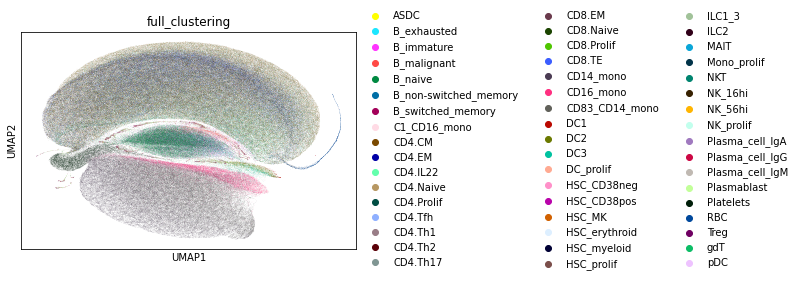

In [13]:
sc.pl.umap(adata, color='full_clustering')

Layers with keys: 